In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [29]:
def ascii_parser(f_pth):

    df = pd.read_csv(f_pth,sep=',',header=None,names=['Points','x','y','z'])
    all_values = df.to_numpy()

    points = all_values[:,0].tolist()
    x_coords = all_values[:,1]
    y_coords = all_values[:,2]
    z_coords = all_values[:,3]

    return points,x_coords,y_coords,z_coords

def plot_3d_points(ax,colour,label,points,x_coords,y_coords,z_coords):

    x = np.array(x_coords)
    y = np.array(y_coords)
    z = np.array(z_coords)

    print(label)

#     ax.scatter(x,y,z,s=15,color=colour,label=label)
    ax.plot(x,y,z,'-o',color=colour,label=label)
    for lbl, x_val, y_val, z_val in zip(points,x,y,z):
        ax.text(x_val,y_val,z_val,lbl,size=10)

    return ax

<IPython.core.display.Javascript object>


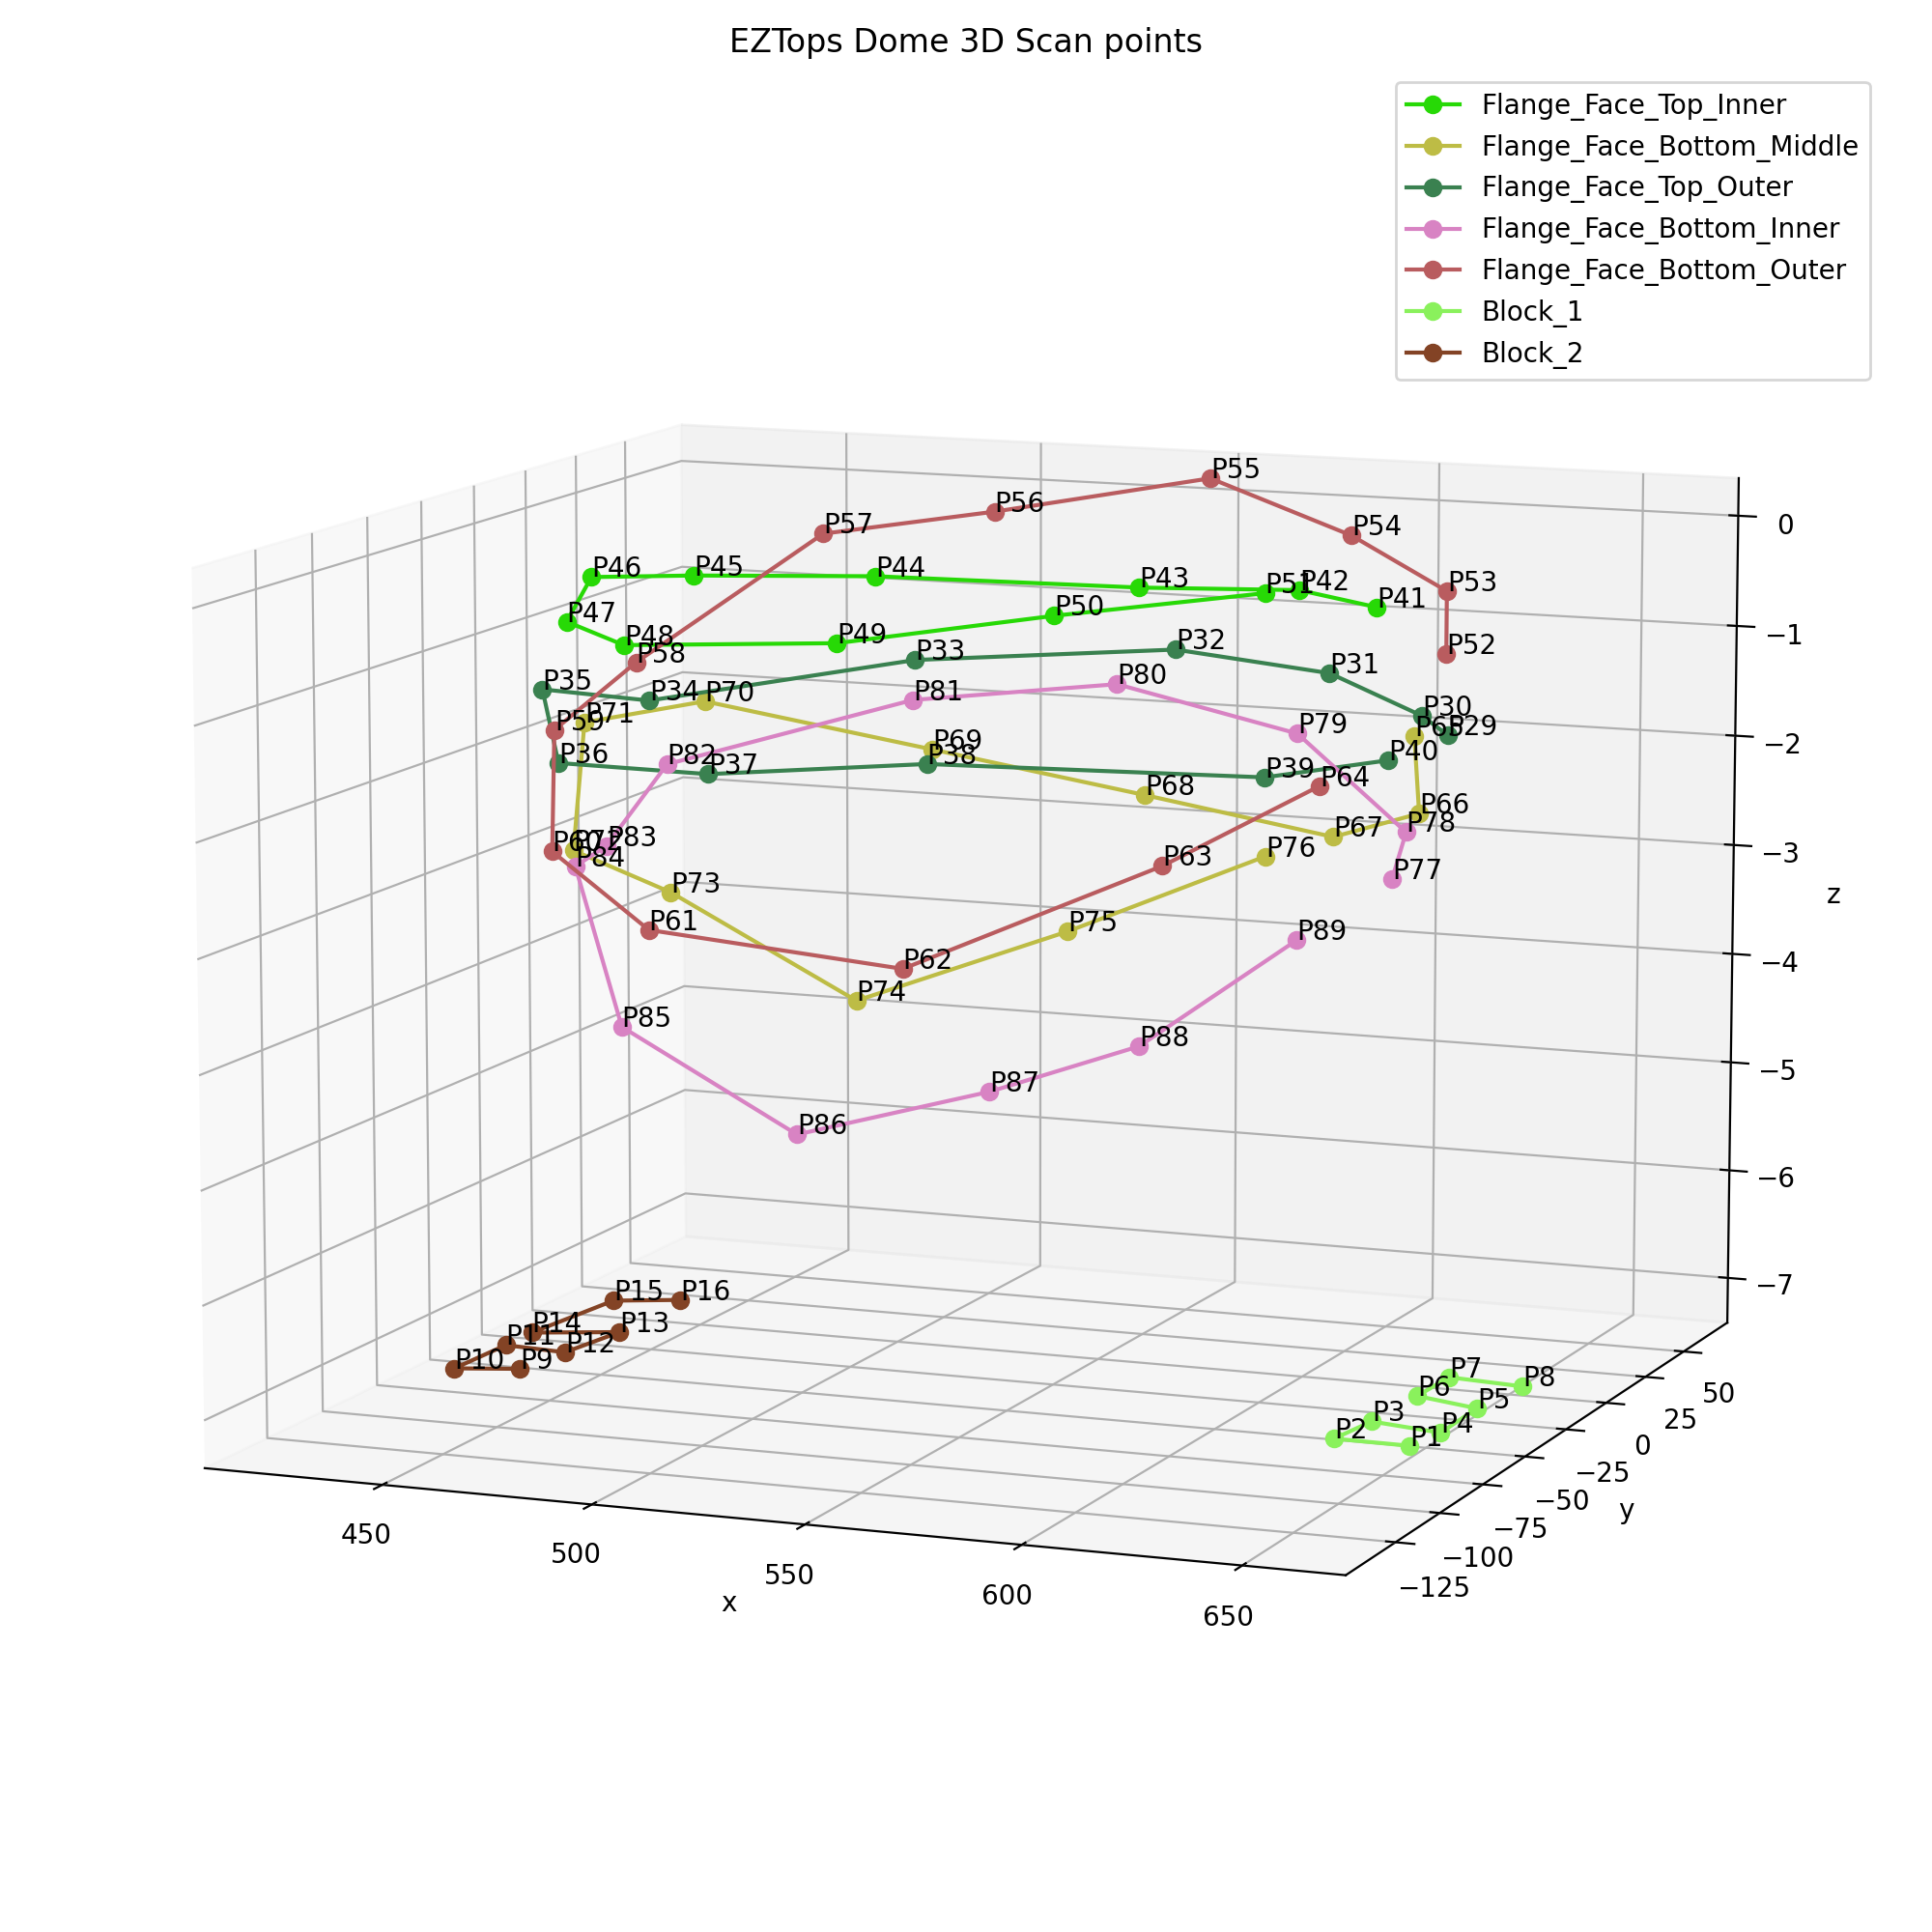

Flange_Face_Top_Inner
Flange_Face_Bottom_Middle
Flange_Face_Top_Outer
Flange_Face_Bottom_Inner
Flange_Face_Bottom_Outer
Block_1
Block_2


In [30]:
data_dir = "/Users/jasonyuan/Desktop/Triumf Lab/CAD Models/EZTops Dome Measurements/Small_Dome/ASCII"
save_pth = "/Users/jasonyuan/Desktop"

figure = plt.figure(figsize=(10,10))
ax = figure.add_subplot(1,1,1,projection='3d')

# Iterate through folder with all ASCII block files
if os.path.isdir(data_dir):
    for i,file in enumerate(os.listdir(data_dir),0):
        if file == ".DS_Store" or not os.path.isfile(data_dir+"/"+file):
            print(file)
            print(os.path.isfile(file))
            continue

        points,x,y,z = ascii_parser(data_dir+"/"+file)
        label = file.split(".")[0]
        
#         if label == "Block_1" or label == "Block_2":
#             z = z+6
        
        ax = plot_3d_points(ax,np.random.rand(3),label,points,x,y,z)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("EZTops Dome 3D Scan points")
ax.legend()

figure.tight_layout()

# plt.savefig(save_pth+"/plot_of_points.png",bbox_inches='tight',format='png')

# %matplotlib notebook
plt.show()